In [3]:
#importing library
import numpy as np
import pandas as pd
pd.set_option('max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report

In [6]:
#loading the dataset
df=pd.read_csv('../input/arketing-campaign/marketing_campaign.csv',delimiter=';')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [7]:
#getting
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [34]:
def onehot_encode(df,column):
    df=df.copy()
    dummies=pd.get_dummies(df[column],prefix=column)
    df=pd.concat([df,dummies],axis=1)
    df=df.drop(column,axis=1)
    return df

In [48]:
def preprocess_inputs(df):
    df=df.copy()
    #Dropping id column
    df=df.drop('ID',axis=1)
    #filling missing value
    df['Income']=df['Income'].fillna(df['Income'].mean())
    #encoding date column
    df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])
    df['Year_Customer']=df['Dt_Customer'].apply(lambda x:x.year)
    df['Month_Customer']=df['Dt_Customer'].apply(lambda x:x.month)
    df['Day_Customer']=df['Dt_Customer'].apply(lambda x:x.day)
    df=df.drop('Dt_Customer',axis=1)
    #One_hot Encoding
    for column in ['Education','Marital_Status']:
        df=onehot_encode(df,column)
    #Split df into x and y
    y=df['Response']
    x=df.drop('Response',axis=1)
    #train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)
    #scaling the data
    scaler=StandardScaler()
    scaler.fit(x_train)
    x_train=pd.DataFrame(scaler.transform(x_train),columns=x.columns)
    x_test=pd.DataFrame(scaler.transform(x_test),columns=x.columns)
    return x_train,x_test,y_train,y_test

In [49]:
x_train,x_test,y_train,y_test=preprocess_inputs(df)
x_train

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Year_Customer,Month_Customer,Day_Customer,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,-1.913598,0.666182,-0.818551,-0.928565,-0.943047,0.940445,-0.000399,0.118913,-0.058848,-0.242557,1.899016,-0.670921,0.670017,0.444401,2.197888,-1.327203,-0.267900,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,-0.071042,0.749737,1.397448,-0.304439,-0.157596,-1.003834,2.242938,-0.536056,-0.035737,-0.043783,-0.332388,1.265042,-0.535070,-0.589134,-0.181489,-0.025262
1,-0.573780,-0.073000,1.038884,0.909806,-0.736818,-0.715194,-0.626743,-0.641544,-0.676671,-0.627602,-0.309914,-0.151413,-0.725185,-0.562565,-0.848420,0.297986,-0.267900,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,-0.071042,0.749737,-0.632170,-0.304439,-0.157596,0.996181,-0.445844,-0.536056,-0.035737,-0.043783,-0.332388,-0.790487,1.868913,-0.589134,-0.181489,-0.025262
2,0.179867,-0.459033,1.038884,-0.928565,-1.046162,-0.840260,-0.626743,-0.685248,-0.676671,-0.531341,-0.774952,-0.670921,-1.073985,-0.898221,-0.848420,1.110581,-0.267900,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,-0.071042,1.616052,-0.519414,-0.304439,-0.157596,-1.003834,-0.445844,1.865476,-0.035737,-0.043783,-0.332388,1.265042,-0.535070,-0.589134,-0.181489,-0.025262
3,-0.071349,1.074137,-0.818551,-0.928565,-1.321134,1.467509,3.181427,0.547217,0.631660,1.682671,-0.251784,-0.670921,2.414019,0.444401,0.065472,-0.514609,-0.267900,3.571328,3.571328,3.791114,-0.113666,-0.101535,0.0,0.0,-1.517709,1.616052,-1.083196,-0.304439,-0.157596,0.996181,-0.445844,-0.536056,-0.035737,-0.043783,3.008535,-0.790487,-0.535070,-0.589134,-0.181489,-0.025262
4,-1.159951,0.684143,-0.818551,0.909806,-1.527363,0.032226,0.225084,0.673960,0.159207,-0.483210,1.937769,0.368095,1.018818,-0.226910,1.588626,-0.108311,-0.267900,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,-0.071042,1.327280,1.171935,-0.304439,-0.157596,0.996181,-0.445844,-0.536056,-0.035737,-0.043783,-0.332388,1.265042,-0.535070,-0.589134,-0.181489,-0.025262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,-0.155087,0.841743,-0.818551,0.909806,0.569301,0.764756,1.477772,0.014023,-0.222389,2.308370,1.375848,-0.151413,-0.027584,1.451367,2.197888,-1.327203,-0.267900,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,-1.517709,0.749737,0.608152,-0.304439,-0.157596,0.996181,-0.445844,-0.536056,-0.035737,-0.043783,3.008535,-0.790487,-0.535070,-0.589134,-0.181489,-0.025262
1564,0.682299,1.506086,-0.818551,-0.928565,1.566075,0.565246,1.653148,0.975520,2.848553,-0.386949,3.836673,-0.670921,-0.376384,0.444401,1.283995,-2.139798,-0.267900,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,1.375626,-0.694119,-0.744927,-0.304439,-0.157596,0.996181,-0.445844,-0.536056,-0.035737,-0.043783,-0.332388,-0.790487,1.868913,-0.589134,-0.181489,-0.025262
1565,-0.908735,1.263423,-0.818551,0.909806,0.191214,0.803467,-0.451367,0.210693,-0.295074,-0.266622,-0.193655,-0.670921,-0.027584,0.108746,-0.239158,-1.733501,-0.267900,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,1.375626,-0.116577,-1.534223,-0.304439,-0.157596,0.996181,-0.445844,-0.536056,-0.035737,-0.043783,3.008535,-0.790487,-0.535070,-0.589134,-0.181489,-0.025262
1566,0.514822,-1.388929,1.038884,-0.928565,0.019356,-0.890882,-0.426313,-0.645914,-0.567643,-0.459145,-0.426173,-0.151413,-0.725185,-0.898221,-0.543789,0.297986,-0.267900,-0.28

In [50]:
x_train.shape

(1568, 40)

In [53]:
#Training the model
inputs=tf.keras.Input(shape=(x_train.shape[1],))
x=tf.keras.layers.Dense(128,activation='relu')(inputs)
x=tf.keras.layers.Dense(128,activation='relu')(x)
outputs=tf.keras.layers.Dense(1,activation='sigmoid')(x)
model=tf.keras.Model(inputs=inputs,outputs=outputs)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
        
    ])
history=model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True)
    ])

2022-03-09 10:20:45.309492: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
40/40 [==============================] - 2s 15ms/step - loss: 0.4027 - accuracy: 0.8461 - auc: 0.6680 - val_loss: 0.3441 - val_accuracy: 0.8854 - val_auc: 0.8318
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2888 - accuracy: 0.8892 - auc: 0.8642 - val_loss: 0.2944 - val_accuracy: 0.9076 - val_auc: 0.8758
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2490 - accuracy: 0.8971 - auc: 0.9086 - val_loss: 0.2805 - val_accuracy: 0.8949 - val_auc: 0.8935
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2227 - accuracy: 0.9083 - auc: 0.9299 - val_loss: 0.2722 - val_accuracy: 0.9045 - val_auc: 0.8930
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2040 - accuracy: 0.9179 - auc: 0.9417 - val_loss: 0.2708 - val_accuracy: 0.9045 - val_auc: 0.9005
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1853 - accuracy: 0.9274 - auc: 0.9533 - val_loss: 0.2894 - 

In [57]:
results=model.evaluate(x_test,y_test)
print('Test Loss:{:.5f}'.format(results[0]))
print('Test Loss:{:.2f}%'.format(results[1]))
print('Test Loss:{:.5f}'.format(results[2]))

21/21 [==============================] - 0s 2ms/step - loss: 0.2630 - accuracy: 0.8958 - auc: 0.9049
Test Loss:0.26298
Test Loss:0.90%
Test Loss:0.90490


In [63]:
y_pred=model.predict(x_test)
y_pred=np.array(y_pred>=0.5,dtype=np.int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [65]:
cm=confusion_matrix(y_test,y_pred)
clr=classification_report(y_test,y_pred,target_names=['Failure','Success'])

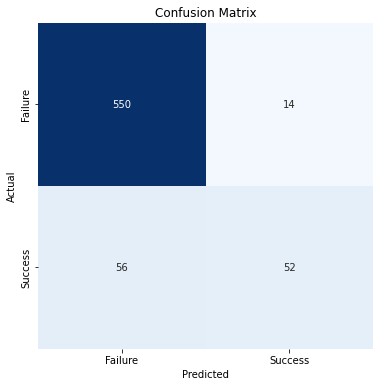

Classification Report................               precision    recall  f1-score   support

     Failure       0.91      0.98      0.94       564
     Success       0.79      0.48      0.60       108

    accuracy                           0.90       672
   macro avg       0.85      0.73      0.77       672
weighted avg       0.89      0.90      0.89       672



In [68]:
plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,fmt='g',vmin=0,cmap='Blues',cbar=False)
plt.xticks(ticks=np.arange(2)+0.5,labels=['Failure','Success'])
plt.yticks(ticks=np.arange(2)+0.5,labels=['Failure','Success'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print('Classification Report................',clr)

In [30]:
x['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [33]:
pd.get_dummies(x['Education'],prefix='Education')

,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,0,1
...,...,...,...,...,...
2235,0,0,1,0,0
2236,0,0,0,0,1
2237,0,0,1,0,0
2238,0,0,0,1,0


In [31]:
x['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [25]:
pd.to_datetime(x['Dt_Customer']).apply(lambda x:x.month)

0        9
1        3
2        8
3        2
4        1
        ..
2235     6
2236     6
2237     1
2238     1
2239    10
Name: Dt_Customer, Length: 2240, dtype: int64

In [19]:
x.isna().sum().sum()

0